Mounted at /content/drive
VENTAS:  (3000, 6)


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro Decorativo,69.94,5.0,2024-01-02,Decoración
1,811,Lámpara De Mesa,105.10,5.0,2024-01-02,Decoración
2,1156,Secadora,97.96,3.0,2024-01-02,Electrodomésticos
3,1372,Heladera,114.35,8.0,2024-01-02,Electrodomésticos
4,1546,Secadora,106.21,4.0,2024-01-02,Electrodomésticos


MARKETING:  (90, 6)


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno De Pared,Tv,4.81,2024-03-20,2024-05-03
1,12,Tablet,Rrss,3.40,2024-03-26,2024-05-13
2,32,Lámpara De Mesa,Email,5.54,2024-03-28,2024-04-20
3,21,Smartphone,Rrss,6.37,2024-03-29,2024-05-16
4,58,Alfombra,Email,4.25,2024-03-31,2024-05-05



Tipos en ventas:
 id_venta                int64
producto               object
precio                float64
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
ingreso               float64
dtype: object

Tipos en marketing:
 id_campanha              int64
producto                object
canal                   object
costo                  float64
fecha_inicio    datetime64[ns]
fecha_fin       datetime64[ns]
dtype: object

## Estadística descriptiva - INGRESO

--- Ingreso ---
Count: 2998
Media: 489.36
Mediana: 418.06
Moda: 345.33
Std: 334.28
Varianza: 111744.33
Rango: 1461.82
IQR: 489.00
Percentiles (25,50,75): [220.92  418.065 709.92 ]

## Estadística descriptiva - PRECIO

--- Precio ---
Count: 2998
Media: 75.29
Mediana: 75.20
Moda: 29.77
Std: 28.74
Varianza: 825.76
Rango: 98.97
IQR: 50.04
Percentiles (25,50,75): [ 50.03    75.205  100.0675]

## Estadística descriptiva - CANTIDAD

--- Cantidad ---
Count: 2998
Media: 6.50
Mediana: 7.00
Moda: 11.0


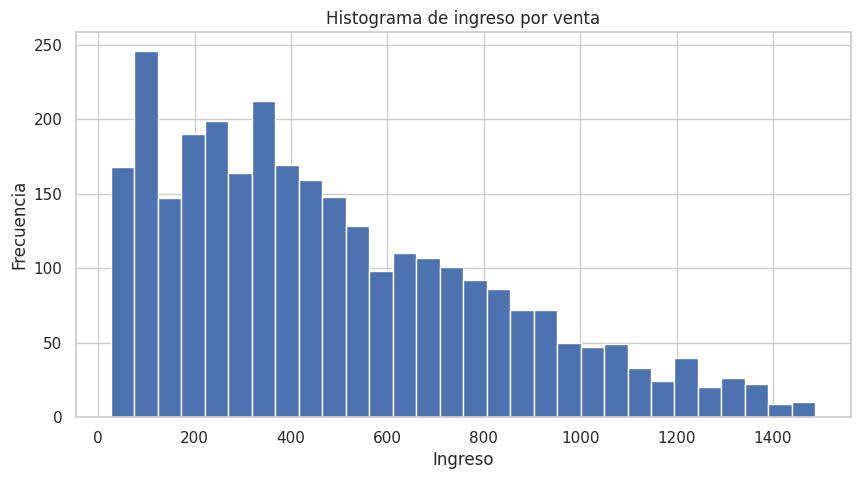

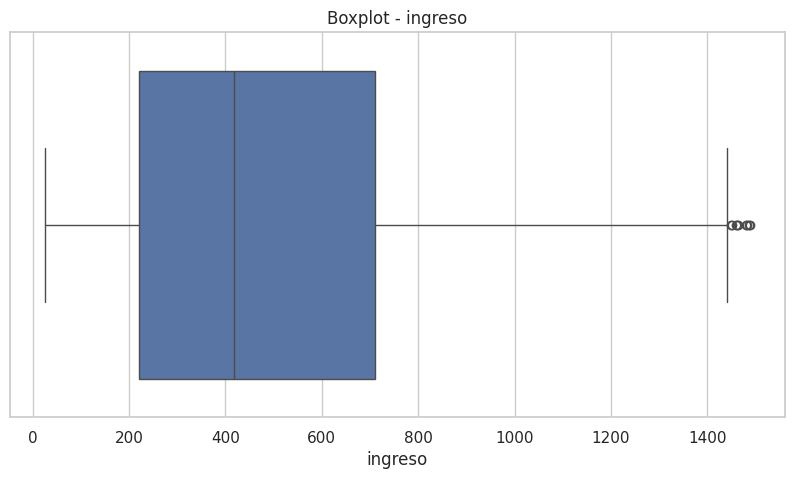

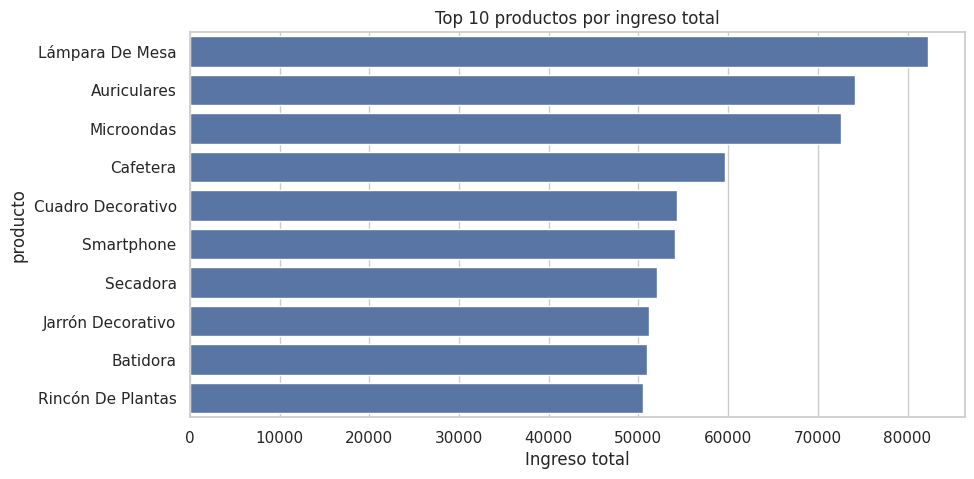

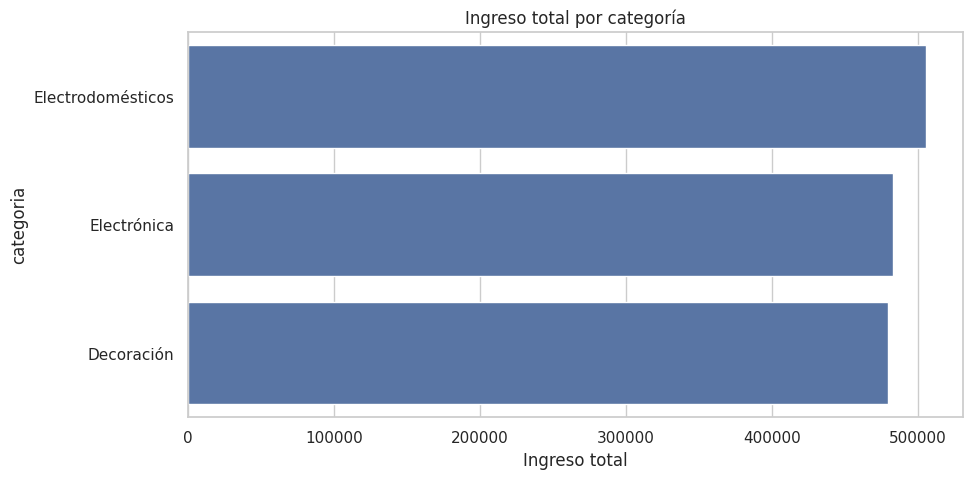

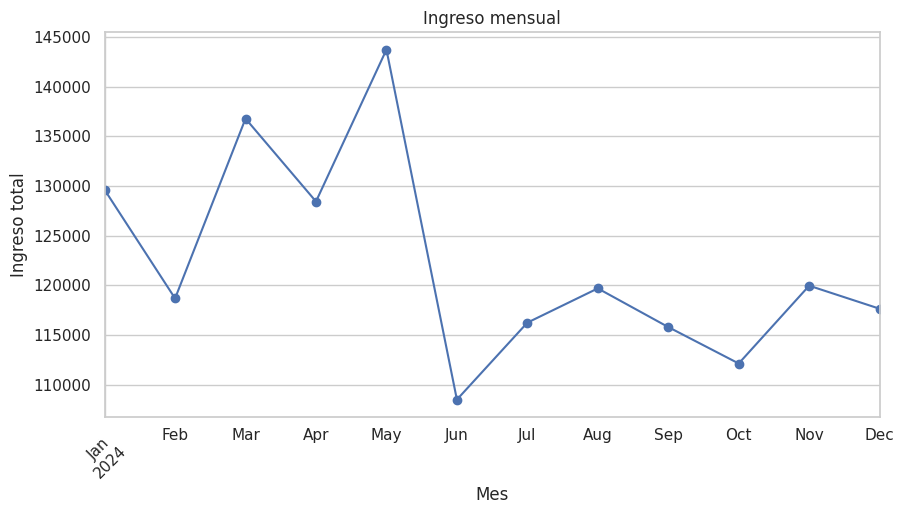


## Estadística descriptiva - COSTO de campañas

--- Costo de campaña ---
Count: 90
Media: 4.93
Mediana: 4.90
Moda: 4.1
Std: 0.95
Varianza: 0.90
Rango: 4.44
IQR: 1.19
Percentiles (25,50,75): [4.3725 4.9    5.5625]


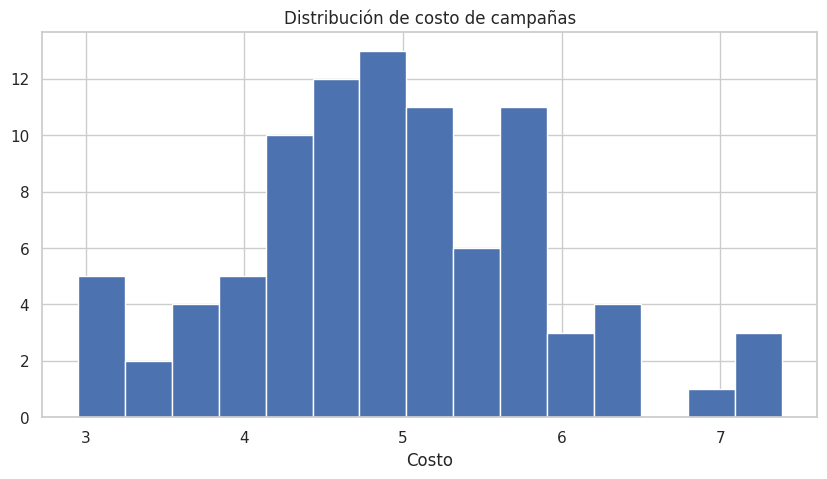

In [ ]:
# === Análisis completo: Ventas + Marketing ===
# Ejecutar en Google Colab. Adaptalo si tus archivos tienen otros nombres/paths.

# 0) Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Estética básica
plt.rcParams['figure.figsize'] = (10,5)
sns.set(style='whitegrid')

# Monto mi drive
from google.colab import drive
drive.mount('/content/drive')

# 1) Cargar datos
# Defino las rutas de los datasets y los cargo como dataframes
ruta_ventas = '/content/drive/MyDrive/datasets/ventas_clean.csv'
ruta_marketing = '/content/drive/MyDrive/datasets/marketing_clean.csv'

ventas = pd.read_csv(ruta_ventas, parse_dates=['fecha_venta'])
marketing = pd.read_csv(ruta_marketing, parse_dates=['fecha_inicio','fecha_fin'])

# Mostrar primeras filas (verifica que cargue OK)
print("VENTAS: ", ventas.shape)
display(ventas.head())
print("MARKETING: ", marketing.shape)
display(marketing.head())

# 2) Limpieza mínima y variables necesarias
# Asegurarse columnas en minúscula y sin espacios (opcional)
ventas.columns = ventas.columns.str.strip().str.lower()
marketing.columns = marketing.columns.str.strip().str.lower()

# Renombrar para consistencia (si tu csv tiene nombres diferentes, adaptalo)
# Ejemplo: en tus datos: producto, precio, cantidad, fecha_venta, categoria
# Ejemplo marketing: id_campanha, producto, canal, costo, fecha_inicio, fecha_fin

# 2.1 Crear ingreso por venta
ventas['ingreso'] = ventas['precio'] * ventas['cantidad']

# 2.2 Revisar tipos de datos
print("\nTipos en ventas:\n", ventas.dtypes)
print("\nTipos en marketing:\n", marketing.dtypes)

# 3) Estadística descriptiva (global) sobre columnas relevantes
def resumen_estadistico(serie, nombre):
    print(f"\n--- {nombre} ---")
    print(f"Count: {serie.count()}")
    print(f"Media: {serie.mean():.2f}")
    print(f"Mediana: {serie.median():.2f}")
    try:
        moda = serie.mode().iloc[0]
    except:
        moda = np.nan
    print(f"Moda: {moda}")
    print(f"Std: {serie.std():.2f}")
    print(f"Varianza: {serie.var():.2f}")
    print(f"Rango: {serie.max() - serie.min():.2f}")
    print(f"IQR: {serie.quantile(0.75) - serie.quantile(0.25):.2f}")
    print(f"Percentiles (25,50,75): {serie.quantile([0.25,0.5,0.75]).values}")

print("\n## Estadística descriptiva - INGRESO")
resumen_estadistico(ventas['ingreso'], 'Ingreso')

print("\n## Estadística descriptiva - PRECIO")
resumen_estadistico(ventas['precio'], 'Precio')

print("\n## Estadística descriptiva - CANTIDAD")
resumen_estadistico(ventas['cantidad'], 'Cantidad')

# 4) Visualizaciones básicas
# 4.1 Histograma de ingreso
plt.figure()
plt.title("Histograma de ingreso por venta")
plt.xlabel("Ingreso")
plt.ylabel("Frecuencia")
plt.hist(ventas['ingreso'].dropna(), bins=30)
plt.show()

# 4.2 Boxplot de ingreso (para outliers)
plt.figure()
plt.title("Boxplot - ingreso")
sns.boxplot(x=ventas['ingreso'].dropna())
plt.show()

# 4.3 Top 10 productos por ingreso total
top_productos = ventas.groupby('producto')['ingreso'].sum().sort_values(ascending=False).head(10)
plt.figure()
sns.barplot(x=top_productos.values, y=top_productos.index)
plt.title("Top 10 productos por ingreso total")
plt.xlabel("Ingreso total")
plt.show()

# 4.4 Ventas por categoria (suma)
ingreso_categoria = ventas.groupby('categoria')['ingreso'].sum().sort_values(ascending=False)
plt.figure()
sns.barplot(x=ingreso_categoria.values, y=ingreso_categoria.index)
plt.title("Ingreso total por categoría")
plt.xlabel("Ingreso total")
plt.show()

# 4.5 Serie temporal mensual de ingresos
ventas['mes'] = ventas['fecha_venta'].dt.to_period('M')
serie_mensual = ventas.groupby('mes')['ingreso'].sum().sort_index()
plt.figure()
serie_mensual.plot(kind='line', marker='o')
plt.title("Ingreso mensual")
plt.xlabel("Mes")
plt.ylabel("Ingreso total")
plt.xticks(rotation=45)
plt.show()

# 5) Estadística descriptiva dataset marketing (sobre costos)
print("\n## Estadística descriptiva - COSTO de campañas")
resumen_estadistico(marketing['costo'], 'Costo de campaña')
plt.figure()
marketing['costo'].hist(bins=15)
plt.title("Distribución de costo de campañas")
plt.xlabel("Costo")
plt.show()



In [ ]:
# 6) Cruce Ventas <-> Marketing
# 6.1 Strategy: vinculamos cada venta a campañas del mismo producto cuyo periodo contenga la fecha_venta.
# Primero hacemos un merge por producto para juntar posibles campañas del mismo producto
merged = ventas.merge(marketing, on='producto', how='left', suffixes=('_venta','_camp'))

# Crear bandera 'en_campaña' donde la fecha_venta esté entre fecha_inicio y fecha_fin
cond = (merged['fecha_venta'] >= merged['fecha_inicio']) & (merged['fecha_venta'] <= merged['fecha_fin'])
merged['en_campaña'] = cond.fillna(False)

# Ventas que cayeron dentro de alguna campaña:
ventas_en_campaña = merged[merged['en_campaña']].copy()

# Ventas que no están asociadas a ninguna campaña (fecha fuera de periodos o no hay campaña para ese producto)
# Podría haber duplicación si un producto tuvo varias campañas que incluyen la misma fecha: en ese caso la venta aparecerá varias veces (1 por campaña).
# Si preferís asignar una sola campaña por venta (por ejemplo la más reciente), se puede priorizar; aquí dejamos todas las coincidencias para análisis de suma por campaña.
print("\nVentas totales:", len(ventas))
print("Ventas asociadas a campaña (coincidencias por producto+fecha):", len(ventas_en_campaña))





Ventas totales: 3000
Ventas asociadas a campaña (coincidencias por producto+fecha): 847


In [ ]:
# 6.2 Métricas: % de ventas que ocurrieron durante campañas (por número de transacciones y por ingreso)
pct_ventas_count = len(ventas_en_campaña) / len(ventas) * 100
pct_ventas_ingreso = ventas_en_campaña['ingreso'].sum() / ventas['ingreso'].sum() * 100
print(f"\nPorcentaje de transacciones en campaña: {pct_ventas_count:.2f}%")
print(f"Porcentaje de ingreso en campaña: {pct_ventas_ingreso:.2f}%")





Porcentaje de transacciones en campaña: 28.23%
Porcentaje de ingreso en campaña: 28.41%


,id_campanha,producto,canal,costo,ventas_generadas,roi
72,65,Horno Eléctrico,Tv,3.08,8646.68,2806.363636
24,47,Auriculares,Email,4.19,11313.32,2699.076372
7,57,Batidora,Email,4.48,10482.29,2338.796875
47,54,Parlantes Bluetooth,Email,2.95,6590.62,2233.108475
64,86,Microondas,Tv,4.25,9019.92,2121.334118
69,55,Smartwatch,Email,4.59,8158.71,1776.496732
16,29,Televisor,Rrss,3.96,6863.97,1732.325758
78,61,Cuadro Decorativo,Tv,5.30,8805.67,1660.447170
55,62,Lámpara De Mesa,Tv,4.51,7296.42,1616.831486
70,14,Adorno De Pared,Rrss,4.16,6527.98,1568.225962


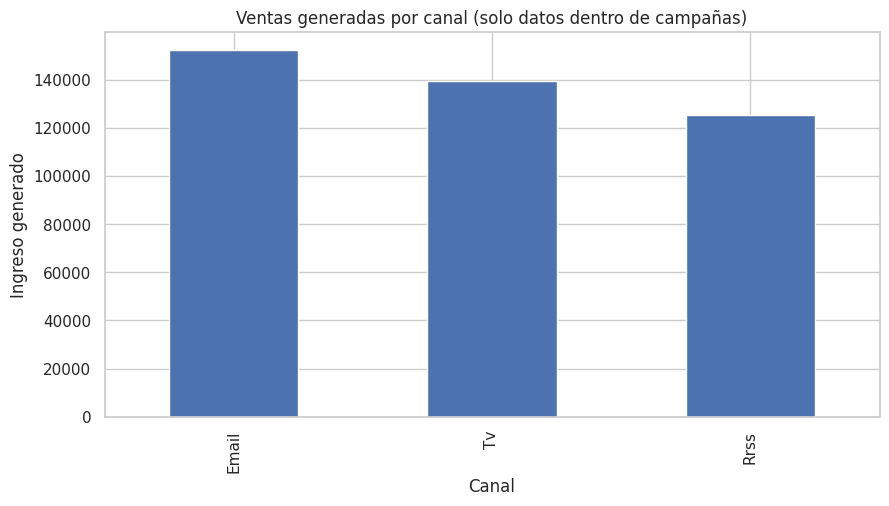

In [ ]:
# 7) Rendimiento por campaña (ventas generadas y ROI)
# Para calcular ventas por campaña, agrupamos por id_campanha (las filas de ventas_en_campaña ya están vinculadas a campañas)
ventas_por_camp = ventas_en_campaña.groupby(['id_campanha','producto','canal'])['ingreso'].sum().reset_index().rename(columns={'ingreso':'ventas_generadas'})

# Unimos costo de campaign
camp_info = marketing[['id_campanha','costo','fecha_inicio','fecha_fin','canal','producto']].drop_duplicates(subset=['id_campanha'])
camp_perf = ventas_por_camp.merge(camp_info, on=['id_campanha','producto','canal'], how='right')

# Si una campaña no tuvo ventas en el periodo, ventas_generadas será NaN -> 0
camp_perf['ventas_generadas'] = camp_perf['ventas_generadas'].fillna(0)

# ROI simple: (ventas_generadas - costo) / costo
camp_perf['roi'] = (camp_perf['ventas_generadas'] - camp_perf['costo']) / camp_perf['costo']

# Mostrar ranking de ROI
camp_perf_sorted = camp_perf.sort_values(by='roi', ascending=False)
display(camp_perf_sorted[['id_campanha','producto','canal','costo','ventas_generadas','roi']].head(15))

# 7.1 Visual: Ventas generadas por canal (solo ventas en campañas)
ventas_canal = ventas_en_campaña.groupby('canal')['ingreso'].sum().sort_values(ascending=False)
plt.figure()
ventas_canal.plot(kind='bar')
plt.title("Ventas generadas por canal (solo datos dentro de campañas)")
plt.xlabel("Canal")
plt.ylabel("Ingreso generado")
plt.show()



In [ ]:
# 8) Análisis adicional sugerido (por cliente, por frecuencia...) - solo si tienes dataset de clientes
# (Aquí te muestro cómo sacar ticket promedio por producto y por categoría)
ticket_producto = ventas.groupby('producto')['ingreso'].agg(['sum','count','mean']).rename(columns={'mean':'ticket_promedio'})
ticket_categoria = ventas.groupby('categoria')['ingreso'].agg(['sum','count','mean']).rename(columns={'mean':'ticket_promedio'})

print("\nTop productos (sum, count, ticket_promedio)")
display(ticket_producto.sort_values('sum', ascending=False).head(10))
print("\nCategorias")
display(ticket_categoria.sort_values('sum', ascending=False))




Top productos (sum, count, ticket_promedio)


,sum,count,ticket_promedio
producto,,,
Lámpara De Mesa,82276.38,176,467.479432
Auriculares,74175.58,143,518.710350
Microondas,72562.89,135,537.502889
Cafetera,59607.31,117,509.464188
Cuadro Decorativo,54297.60,100,542.976000
Smartphone,54132.44,101,535.964752
Secadora,52115.45,100,521.154500
Jarrón Decorativo,51130.88,100,511.308800
Batidora,50979.20,100,509.792000



Categorias


,sum,count,ticket_promedio
categoria,,,
Electrodomésticos,505299.63,1000,505.29963
Electrónica,482577.80,998,483.54489
Decoración,479216.09,1000,479.21609


In [ ]:
# 9) Guardar resultados claves a archivos (opcional)
Path('output').mkdir(exist_ok=True)
camp_perf_sorted.to_csv('output/campañas_ranking_roi.csv', index=False)
ventas.groupby('producto')['ingreso'].sum().sort_values(ascending=False).to_csv('output/ingreso_por_producto.csv')
serie_mensual.to_csv('output/ingreso_mensual.csv')

print("\nArchivos guardados en carpeta ./output: campañas_ranking_roi.csv, ingreso_por_producto.csv, ingreso_mensual.csv")

# 10) Plantilla automática de conclusiones (texto)
def generar_conclusiones(ventas_df, camp_perf_df):
    concl = []
    # Distribución
    if ventas_df['ingreso'].skew() > 1:
        concl.append("La distribución de ingresos está fuertemente asimétrica a la derecha; hay pocas ventas de muy alto valor que elevan la media.")
    else:
        concl.append("La distribución de ingresos no presenta una asimetría extrema.")
    # Varianza
    cv = ventas_df['ingreso'].std() / ventas_df['ingreso'].mean()
    concl.append(f"El coeficiente de variación del ingreso es {cv:.2f}, lo que indica {'alta' if cv>0.5 else 'moderada/baja'} variabilidad relativa.")
    # Campañas
    if len(camp_perf_df) > 0:
        mejor = camp_perf_df.sort_values('roi', ascending=False).iloc[0]
        peor = camp_perf_df.sort_values('roi', ascending=True).iloc[0]
        concl.append(f"La campaña con mayor ROI fue id {int(mejor['id_campanha'])}, producto {mejor['producto']}, con ROI {mejor['roi']:.2f}.")
        concl.append(f"La campaña con peor ROI fue id {int(peor['id_campanha'])}, producto {peor['producto']}, con ROI {peor['roi']:.2f}.")
    return "\n".join(concl)

print("\n--- Conclusiones automáticas (borrador) ---")
print(generar_conclusiones(ventas, camp_perf_sorted))


Archivos guardados en carpeta ./output: campañas_ranking_roi.csv, ingreso_por_producto.csv, ingreso_mensual.csv

--- Conclusiones automáticas (borrador) ---
La distribución de ingresos no presenta una asimetría extrema.
El coeficiente de variación del ingreso es 0.68, lo que indica alta variabilidad relativa.
La campaña con mayor ROI fue id 65, producto Horno Eléctrico, con ROI 2806.36.
La campaña con peor ROI fue id 64, producto Heladera, con ROI -1.00.


In [ ]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Datos de ejemplo

df = pd.DataFrame({
 'categoria': ['A', 'B', 'C', 'D'],
 'valor_2023': [10, 15, 7, 12],
 'valor_2024': [14, 18, 9, 16]
})

# Dropdown para seleccionar el año
selector = widgets.Dropdown(
   options=['valor_2023', 'valor_2024'],
   value='valor_2023',
   description='Año:',
   style={'description_width': 'initial'}
)

# Función de actualización
def mostrar_grafico(columna_seleccionada):
   fig = px.bar(
       df,
       x='categoria',
       y=columna_seleccionada,
       title=f'Comparación de Categorías – {columna_seleccionada[-4:]}',
       labels={columna_seleccionada: 'Valor'}
 )
   fig.update_layout(
       xaxis_title='Categoría',
       yaxis_title='Valor'
   )
   fig.show()

# Ejecutar por primera vez
mostrar_grafico(selector.value)

# Conectar widget
widgets.interact(mostrar_grafico, columna_seleccionada=selector)

interactive(children=(Dropdown(description='Año:', options=('valor_2023', 'valor_2024'), style=DescriptionStyl…

<function __main__.mostrar_grafico(columna_seleccionada)>

# Plotly


In [ ]:
# ============================
# Instalar Dash y sus dependencias
# ============================
!pip install dash dash-html-components dash-core-components



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 77.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

# ============================
# 1. Cargar tu archivo de ventas
# ============================

# Monto mi drive
from google.colab import drive
drive.mount('/content/drive')

# 1) Cargar datos
# Defino las rutas de los datasets y los cargo como dataframes
ruta_ventas = '/content/drive/MyDrive/datasets/ventas_clean.csv'


df = pd.read_csv(ruta_ventas)

# Asegurar que la fecha es datetime
df["fecha_venta"] = pd.to_datetime(df["fecha_venta"])

# Crear columna de ventas totales
df["ventas"] = df["precio"] * df["cantidad"]
print("se creo la col de ventas totales")

# Crear columnas de mes
#df["mes"] = df["fecha_venta"].dt.month
#df["mes_nombre"] = df["fecha_venta"].dt.strftime("%B")
# Extraer mes
df["mes"] = df["fecha_venta"].dt.month

# Nombre ordenado del mes
meses_orden = {
    1: "Enero", 2: "Febrero", 3: "Marzo", 4: "Abril",
    5: "Mayo", 6: "Junio", 7: "Julio", 8: "Agosto",
    9: "Septiembre", 10: "Octubre", 11: "Noviembre", 12: "Diciembre"
}

df["mes_nombre"] = df["mes"].map(meses_orden)


print("se creo la col de mes")

# ============================
# 2. Crear la app Dash
# ============================
app = Dash(__name__)

app.layout = html.Div([
    html.H2("Ventas mensuales por producto"),

    dcc.Dropdown(
        id="selector-producto",
        options=[
            {"label": prod, "value": prod}
            for prod in sorted(df["producto"].unique())
        ],
        value=sorted(df["producto"].unique())[0],
        clearable=False,
        style={"width": "350px"}
    ),

    dcc.Graph(id="grafico-mensual")
])

# ============================
# 3. Callback: actualizar gráfico según el mes seleccionado
# ============================
@app.callback(
    Output("grafico-mensual", "figure"),
    Input("selector-producto", "value")
)
def actualizar_grafico(producto_sel):
    # Filtrar por producto
    df_prod = df[df["producto"] == producto_sel]

    # si no hay filas, devolver gráfico vacío
    if df_prod.empty:
        return px.line(title=f"Sin datos para {producto_sel}")

    # Agrupar por mes (solo el número)
    df_mensual = (
        df_prod.groupby("mes")["ventas"]
        .sum()
        .reset_index()
        .sort_values("mes")
    )

    # Agregar nombre del mes ordenado
    df_mensual["mes_nombre"] = df_mensual["mes"].map(meses_orden)

    fig = px.line(
        df_mensual,
        x="mes_nombre",
        y="ventas",
        markers=True,
        title=f"Ventas mensuales de: {producto_sel}"
    )

    fig.update_layout(
        xaxis_title="Mes",
        yaxis_title="Ventas ($)"
    )

    return fig

# ============================
# 4. Ejecutar servidor
# ============================
if __name__ == "__main__":
    app.run(debug=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
se creo la col de ventas totales
se creo la col de mes
Dash is running on http://127.0.0.1:8050/



INFO:dash.dash:Dash is running on http://127.0.0.1:8050/



 * Serving Flask app '__main__'
 * Debug mode: on


In [ ]:
!pip install jupyter-dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html, Input, Output # Changed from jupyter_dash import JupyterDash

# ========================================
# 1. Cargar archivo
# ========================================
#df = pd.read_csv("ventas_clean.csv")

# Monto mi drive
from google.colab import drive
drive.mount('/content/drive')

# 1) Cargar datos
# Defino las rutas de los datasets y los cargo como dataframes
ruta_ventas = '/content/drive/MyDrive/datasets/ventas_clean.csv'


df = pd.read_csv(ruta_ventas)

df["fecha_venta"] = pd.to_datetime(df["fecha_venta"])
df["ventas"] = df["precio"] * df["cantidad"]
df["mes"] = df["fecha_venta"].dt.month

meses_orden = {
    1: "Enero", 2: "Febrero", 3: "Marzo", 4: "Abril",
    5: "Mayo", 6: "Junio", 7: "Julio", 8: "Agosto",
    9: "Septiembre", 10: "Octubre", 11: "Noviembre", 12: "Diciembre"
}

df["mes_nombre"] = df["mes"].map(meses_orden)

print(df.head(10))

# ========================================
# 2. App Dash
# ========================================
app = Dash(__name__) # Changed from app = JupyterDash(__name__)

app.layout = html.Div([
    html.H2("Ventas Mensuales por Producto"),

    dcc.Dropdown(
        id="selector-producto",
        options=[{"label": prod, "value": prod} for prod in sorted(df["producto"].unique())],
        value=sorted(df["producto"].unique())[0],
        clearable=False,
        style={"width": "350px"}
    ),

    dcc.Graph(id="grafico-mensual")
])

# ========================================
# 3. Callback
# ========================================
@app.callback(
    Output("grafico-mensual", "figure"),
    Input("selector-producto", "value")
)
def actualizar_grafico(producto_sel):

    df_prod = df[df["producto"] == producto_sel]

    df_mensual = (
        df_prod.groupby("mes")["ventas"]
        .sum()
        .reset_index()
        .sort_values("mes")
    )

    df_mensual["mes_nombre"] = df_mensual["mes"].map(meses_orden)

    fig = px.line(
        df_mensual,
        x="mes_nombre",
        y="ventas",
        markers=True,
        title=f"Ventas mensuales de: {producto_sel}"
    )

    return fig

# ========================================
# 4. Ejecutar en Google Colab
# ========================================
if __name__ == "__main__":
    app.run(debug=True) # Changed from app.run_server(mode='inline')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dash is running on http://127.0.0.1:8050/



INFO:dash.dash:Dash is running on http://127.0.0.1:8050/



 * Serving Flask app '__main__'
 * Debug mode: on


In [ ]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
import re # Importar la librería re para expresiones regulares

# ========================================
# 1. Cargar archivo
# ========================================

# Monto mi drive
from google.colab import drive
drive.mount('/content/drive')

# 1) Cargar datos
# Defino las rutas de los datasets y los cargo como dataframes
ruta_ventas = '/content/drive/MyDrive/datasets/ventas_clean.csv'

df = pd.read_csv(ruta_ventas)

df["fecha_venta"] = pd.to_datetime(df["fecha_venta"])
df["ventas"] = df["precio"] * df["cantidad"]

# Limpiar la columna de producto para eliminar espacios en blanco
# Eliminamos la limpieza con regex para evitar posibles inconsistencias con ipywidgets
df["producto"] = df["producto"].str.strip()

df["mes"] = df["fecha_venta"].dt.month

meses_orden = {
    1: "Enero", 2: "Febrero", 3: "Marzo", 4: "Abril",
    5: "Mayo", 6: "Junio", 7: "Julio", 8: "Agosto",
    9: "Septiembre", 10: "Octubre", 11: "Noviembre", 12: "Diciembre"
}

df["mes_nombre"] = df["mes"].map(meses_orden)

print(df.head(10))

# Obtener la lista de productos únicos y limpiados una sola vez
productos_unicos_ordenados = sorted(df["producto"].unique())

# Crear la lista de opciones para el Dropdown como tuplas (label, value)
_options_list = []
if productos_unicos_ordenados:
    _options_list = [(prod, prod) for prod in productos_unicos_ordenados]
    _default_value = _options_list[0][1] # Obtener el valor de la primera tupla
else:
    _default_value = None

# Dropdown para seleccionar el producto
selector = widgets.Dropdown(
 options=_options_list,
 value=_default_value,
 description='Producto:',
 style={'description_width': 'initial'}
)

# Función de actualización
def mostrar_grafico(columna_seleccionada):
   # Filtrar por el producto seleccionado (la columna_seleccionada aquí es el nombre del producto)
   df_filtrado = df[df['producto'] == columna_seleccionada]

   # Agrupar por mes y sumar las ventas
   df_mensual = df_filtrado.groupby('mes_nombre')['ventas'].sum().reset_index()

   # Asegurarse de que los meses estén en orden correcto para el gráfico
   df_mensual['mes_nombre'] = pd.Categorical(df_mensual['mes_nombre'], categories=meses_orden.values(), ordered=True)
   df_mensual = df_mensual.sort_values('mes_nombre')

   fig = px.bar(
                df_mensual,
                x='mes_nombre',
                y='ventas',
                title=f'Ventas Mensuales de {columna_seleccionada}',
                labels={'mes_nombre': 'Mes', 'ventas': 'Ventas ($)'}
   )
   fig.show()

# Ejecutar por primera vez (solo si hay productos para seleccionar)
if _default_value:
    mostrar_grafico(selector.value)

# Conectar widget
widgets.interact(mostrar_grafico,
columna_seleccionada=selector)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   id_venta           producto  precio  cantidad fecha_venta  \
0       792  Cuadro Decorativo   69.94       5.0  2024-01-02   
1       811    Lámpara De Mesa  105.10       5.0  2024-01-02   
2      1156           Secadora   97.96       3.0  2024-01-02   
3      1372           Heladera  114.35       8.0  2024-01-02   
4      1546           Secadora  106.21       4.0  2024-01-02   
5      1697    Horno Eléctrico   35.35       9.0  2024-01-02   
6      1710   Plancha De Vapor   65.43       2.0  2024-01-02   
7      2959          Proyector   88.17       9.0  2024-01-02   
8       318  Rincón De Plantas   79.86      11.0  2024-01-03   
9       419         Candelabro   66.11       8.0  2024-01-03   

           categoria  ventas  mes mes_nombre  
0         Decoración  349.70    1      Enero  
1         Decoración  525.50    1      Enero  
2  Electrodomésticos  293

interactive(children=(Dropdown(description='Producto:', options=(('Adorno De Pared', 'Adorno De Pared'), ('Alf…

<function __main__.mostrar_grafico(columna_seleccionada)>

In [ ]:
# Para quitar los dos graficos pero no funciona...
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display, HTML # Import HTML
import re # Importar la librería re para expresiones regulares

# ========================================
# 1. Cargar archivo
# ========================================

# Monto mi drive
#from google.colab import drive
#drive.mount('/content/drive')

# 1) Cargar datos
# Defino las rutas de los datasets y los cargo como dataframes
#ruta_ventas = '/content/drive/MyDrive/datasets/ventas_clean.csv'

#df = pd.read_csv(ruta_ventas)
df = df_ventas_ingresos.copy()

df["ventas"] = df["precio"] * df["cantidad"]

# Limpiar la columna de producto para eliminar espacios en blanco
# Eliminamos la limpieza con regex para evitar posibles inconsistencias con ipywidgets
df["producto"] = df["producto"].str.strip()

df["mes"] = df["fecha_venta"].dt.month

meses_orden = {
    1: "Enero", 2: "Febrero", 3: "Marzo", 4: "Abril",
    5: "Mayo", 6: "Junio", 7: "Julio", 8: "Agosto",
    9: "Septiembre", 10: "Octubre", 11: "Noviembre", 12: "Diciembre"
}

df["mes_nombre"] = df["mes"].map(meses_orden)


# Obtener la lista de productos únicos y limpiados una sola vez
productos_unicos_ordenados = sorted(df["producto"].unique())

# Crear la lista de opciones para el Dropdown como tuplas (label, value)
_options_list = []
if productos_unicos_ordenados:
    _options_list = [(prod, prod) for prod in productos_unicos_ordenados]
    _default_value = _options_list[0][1] # Obtener el valor de la primera tupla
else:
    _default_value = None

# Dropdown para seleccionar el producto
selector = widgets.Dropdown(
 options=_options_list,
 value=_default_value,
 description='Producto:',
 style={'description_width': 'initial'}
)

# Create an output widget to hold the plot
output_area = widgets.Output()

# Función de actualización
def mostrar_grafico(columna_seleccionada):
   with output_area: # Direct output to this area
       output_area.clear_output(wait=True) # Clear previous plot
       try:
           # Filtrar por el producto seleccionado
           df_filtrado = df[df['producto'] == columna_seleccionada]

           # Agrupar por mes y sumar las ventas
           df_mensual = df_filtrado.groupby('mes_nombre')['ingreso'].sum().reset_index()

           # Ensure months are in correct order for the graph
           df_mensual['mes_nombre'] = pd.Categorical(df_mensual['mes_nombre'], categories=meses_orden.values(), ordered=True)
           df_mensual = df_mensual.sort_values('mes_nombre')

           fig = px.bar(
                        df_mensual,
                        x='mes_nombre',
                        y='ingreso',
                        title=f'Ventas Mensuales de {columna_seleccionada}',
                        labels={'mes_nombre': 'Mes', 'ingreso': 'Ventas ($)'}
           )
           fig.show(renderer='colab') # Display the plotly figure using colab renderer
       except Exception as e:
           print(f"Ocurrió un error al generar el gráfico: {e}")

# Display the selector and the output area below it
display(selector, output_area)

# Call the function once for the initial display with the default value
# This will render the first plot into output_area after output_area is displayed
mostrar_grafico(selector.value)

# Connect the selector to the function via observing changes
selector.observe(lambda change: mostrar_grafico(change.new), names='value')